author : sybyeon1102@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정
plt.rc('font', size=16)

In [3]:
higher = [76, 87, 91]
lower = [25, 28, 42]

In [4]:
income = ['저소득층', '중간층', '고소득층']

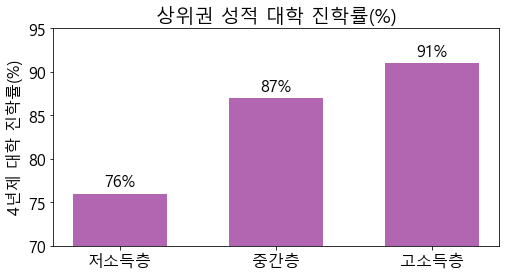

In [5]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

width = 0.6
rects = ax.bar(income, higher, width=width, color='purple', alpha=0.6)
ax.set_ylim(70, 95)
ax.set_ylabel('4년제 대학 진학률(%)')
ax.set_title('상위권 성적 대학 진학률(%)')

ax.bar_label(rects, padding=3, fmt='%d%%')
plt.show()

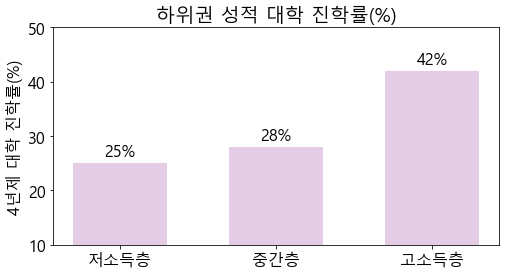

In [6]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

width = 0.6
rects = ax.bar(income, lower, width=width, color='purple', alpha=0.2)
ax.set_ylim(10, 50)
ax.set_ylabel('4년제 대학 진학률(%)')
ax.set_title('하위권 성적 대학 진학률(%)')

ax.bar_label(rects, padding=3, fmt='%d%%')
plt.show()

In [32]:
df2 = pd.read_csv('./region_dbstat_00.csv')

In [33]:
df2

,강원(춘천),강원영동(강릉),경기북부,경남,광주.전남,대구.경북,대전.충남,부산,수원,인천,전북,제주,충북,서울
0,10779,6414,43664,25602,25409,44638,36483,43698,56821,50346,15813,5585,12953,111236
1,671,3949,30199,22590,39701,35840,34499,34962,31871,34829,12997,5396,12073,51329
2,261,153,1426,1146,724,1475,1497,1212,1902,1809,247,234,429,2013


In [35]:
df3 = df2.copy()
for col in df2.columns:
    df3[col] = (df2[col]/df2[col].sum()*100).round(2)
df3 = df3.transpose()
df3 = df3.sort_values(0)
df3

,0,1,2
광주.전남,38.60,60.30,1.10
제주,49.80,48.11,2.09
대전.충남,50.34,47.60,2.07
충북,50.89,47.43,1.69
경남,51.89,45.79,2.32
전북,54.42,44.73,0.85
대구.경북,54.47,43.73,1.80
부산,54.71,43.77,1.52
인천,57.88,40.04,2.08
경기북부,58.00,40.11,1.89


In [36]:
df = pd.read_pickle('./region_glucat_percentage.pkl')

In [37]:
df['1+2'] = df[1]+df[2]

In [38]:
df = df.sort_values('1+2')

In [39]:
df.index

Index(['서울', '수원', '강원영동(강릉)', '강원(춘천)', '경기북부', '인천', '부산', '대구.경북', '전북',
       '경남', '충북', '대전.충남', '제주', '광주.전남'],
      dtype='object')

In [40]:
df['지역'] = ['서울', '경기남부', '강원영동', '강원영서', '경기북부', '인천', '부산', '경북', '전북',
       '경남', '충북', '충남', '제주', '전남']

In [41]:
df.set_index('지역', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_3088\3605717393.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=45)


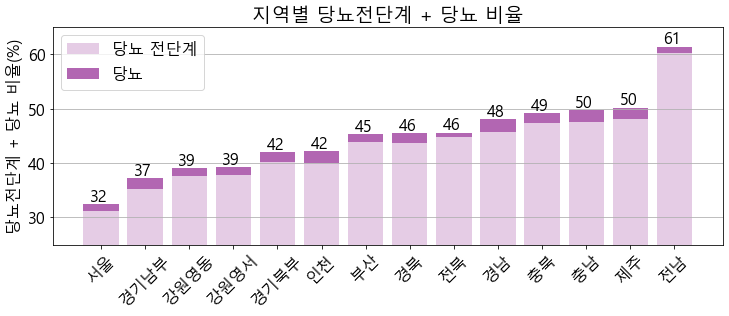

In [42]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

width = 0.8
ax.bar(df.index, df[1], width=width, color='purple', alpha=0.2, label='당뇨 전단계')
ax.bar(df.index, df[2], width=width, color='purple', alpha=0.6, bottom=df[1], label='당뇨')
ax.set_xticklabels(df.index, rotation=45)
ax.set_ylim(25, 65)
ax.set_ylabel('당뇨전단계 + 당뇨 비율(%)')
ax.legend()
ax.grid(axis='y')
ax.set_title('지역별 당뇨전단계 + 당뇨 비율')
for i, tot in enumerate(df['1+2']):
    ax.text(i-0.25, tot+0.5, f'{tot:.0f}')

plt.show()